## Analysis of the Characters in Three-Body Problem (三体)

In [4]:
# download book chapters to text files

from bs4 import BeautifulSoup
import urllib.request

url = "https://docs.python.org/3.4/howto/urllib2.html"
HEADERS = { 'User-Agent' : 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)' }

# https://www.kunnu.com/santi/
BASE_URL = 'https://www.kunnu.com/santi/'
START = 26651
END = 26695
PAGE_IDS = [x for x in range(START, END)]

def get_soup_from_url(url):
    print(f"getting html for {url}")
    req = urllib.request.Request(url, headers=HEADERS)
    response = urllib.request.urlopen(req)
    page = response.read()
    soup = BeautifulSoup(page, 'html.parser')
    return soup

def download_chapters():
    urls = [f"{BASE_URL}{page_id}.htm" for page_id in PAGE_IDS]
    for url in urls:
        try:
            soup = get_soup_from_url(url)
            # chapter title
            title = soup.find('h1', {'id': 'nr_title'}).text
            print(title)
            main_div = soup.find('div', {'id': 'nr1'})
            paragraphs = main_div.findChildren('p')
            chapter_text = "".join([x.text for x in paragraphs])
            print(len(paragraphs))

            with open(f"chapters/{url.split('/')[-1]}", 'w+') as f:
                f.write(chapter_text)
        except urllib.error.HTTPError as e:
            print(f"not able to get text for URL, going to next URL")
            continue

In [5]:
download_chapters()

getting html for https://www.kunnu.com/santi/26651.htm
1.疯狂年代
58
getting html for https://www.kunnu.com/santi/26652.htm
2.寂静的春天
103
getting html for https://www.kunnu.com/santi/26653.htm
3.红岸之一
62
getting html for https://www.kunnu.com/santi/26654.htm
4.科学边界
140
getting html for https://www.kunnu.com/santi/26655.htm
5.台球
53
getting html for https://www.kunnu.com/santi/26656.htm
6.射手和农场主
171
getting html for https://www.kunnu.com/santi/26657.htm
7.三体、周文王、长夜
133
getting html for https://www.kunnu.com/santi/26658.htm
8.叶文洁
38
getting html for https://www.kunnu.com/santi/26659.htm
9.宇宙闪烁
87
getting html for https://www.kunnu.com/santi/26660.htm
10.大史
90
getting html for https://www.kunnu.com/santi/26661.htm
11.三体、墨子、烈焰
100
getting html for https://www.kunnu.com/santi/26662.htm
12.红岸之二
47
getting html for https://www.kunnu.com/santi/26663.htm
13.红岸之三
70
getting html for https://www.kunnu.com/santi/26664.htm
14.红岸之四
26
getting html for https://www.kunnu.com/santi/26665.htm
15.三体、哥白尼、宇宙橄榄球、三日

In [4]:
# write each of the 36 chapter files to a single file called "full_text.txt"
import glob
chapters = glob.glob('chapters/*.htm')

with open("full_text.txt", "w+") as full_text:
    for chapter in chapters:
        with open(chapter, "r") as chapter_file:
            full_text.write(chapter_file.read())
            full_text.write("\n")

In [2]:
# sort characters in Three-body problem by frequency
from collections import defaultdict
import string

with open("full_text.txt", "r") as f:
    full_text = f.read()
    print(f"Full length of text: {len(full_text)}")

character_dictionary = defaultdict(lambda: 0)

filtered_symbols = [
    "。", "：", "；", "？", "！", "…", " ",  "—", # chinese full-width punctuation 
    "“", "”", "‘", "’", # non-standard quotation marks (TODO: not sure what these are called)
    "，", "、", # two types of commas in Chinese, one for grammar and one for lists
    "※", # used for footnotes I think
    "【", "】", "《", "》", "（", "）", # parentheses come in these three varieties
    "□", # you might remember where this character is used in the book!
    "·", " ", " "
    "*", "|", "　", "～", "．", " ", #misc
    "Ⅰ", "Ⅲ", "Ⅱ", # numerical symbols
    # emoji that were included in the scrapped text used to promote the site
    "🍱", "🍌", "🐸", "🐬", "🍋", "🥑", "🍀", "💐", "🍅", "💦", "🦁", "🌼", "🍏",
    "🐠", "🐢", "🐱", "🐙", "👻", "🌂", "🐕", "🍎", "👑", "👓", "🐔",
    "τ", "ε", "℃", "±", # scientific symbols, naturally
] + list(string.printable) # a-Z A-Z 0-9, and misc. ascii characters

for character in full_text:
    if character not in filtered_symbols:
        character_dictionary[character] += 1

print(f"Unique characters in the full text: {len(character_dictionary)}")

sorted_items = dict(sorted(
        character_dictionary.items(), 
        reverse=True, 
        key=lambda item: item[1]))

for char, count in sorted_items.items(): print(char, count)

Full length of text: 189567
Unique characters in the full text: 2853
的 7944
一 3231
是 2585
了 2547
在 2119
这 1943
个 1705
不 1636
有 1512
到 1316
我 1316
人 1297
上 1241
他 1226
大 1194
地 1128
中 1108
们 1103
那 1100
文 1025
说 978
来 964
着 912
时 901
出 858
你 854
就 815
看 809
能 765
后 714
三 703
下 700
她 688
子 678
汪 672
和 667
没 624
体 621
都 617
发 608
对 607
过 606
现 596
淼 593
很 580
么 572
可 570
也 565
成 546
但 531
面 528
天 527
叶 521
要 500
为 497
以 493
学 493
洁 480
明 472
自 471
去 454
只 452
太 452
然 451
会 441
行 438
道 429
想 427
得 426
些 417
生 416
星 411
多 411
起 409
它 406
样 404
里 396
小 395
动 391
开 387
于 387
还 378
最 372
球 370
知 370
间 365
前 363
问 361
种 360
什 359
已 358
将 358
两 354
阳 352
长 351
光 344
分 344
界 343
进 337
用 337
次 334
世 333
同 328
从 326
像 325
实 325
向 319
空 317
头 312
其 312
射 307
方 305
好 304
信 303
当 296
年 295
己 294
机 294
事 289
被 289
部 286
力 285
与 282
点 279
意 275
理 274
之 274
几 270
无 270
外 269
经 269
红 261
系 259
电 258
正 258
者 255
而 254
所 254
定 252
十 252
接 251
回 248
家 247
高 245
眼 242
声 242
计 240
心 237
作 236
数 235
感 233
科 231

In [8]:
# write the most common characters in Three-body problem to a csv with rank
import csv

with open("most_common_characters_in_book.csv", "w+") as f:
    csv_w = csv.writer(f)
    csv_w.writerow(["rank", "character"])

    for rank, character in enumerate(sorted_items):
        csv_w.writerow([rank+1, character])

In [24]:
# read in both csv files and write their rows to dictionaries
import csv

def csv_to_dict(filepath):
    d = {}
    with open(filepath, "r") as f:
        csv_file = csv.reader(f)
        for row in csv_file:
            if row[0] == "rank": continue
            d[row[1]] = row[0]
    return d

overall_ranks = csv_to_dict("most_common_characters_corrected.csv")
book_ranks = csv_to_dict("most_common_characters_in_book.csv")
print(overall_ranks)
print(book_ranks)



{'的': '1', '是': '2', '不': '3', '我': '4', '一': '5', '有': '6', '大': '7', '在': '8', '人': '9', '了': '10', '中': '11', '到': '12', '资': '13', '要': '14', '可': '15', '以': '16', '这': '17', '个': '18', '你': '19', '会': '20', '好': '21', '为': '22', '上': '23', '来': '24', '就': '25', '学': '26', '交': '27', '也': '28', '用': '29', '能': '30', '如': '31', '文': '32', '时': '33', '没': '34', '说': '35', '他': '36', '看': '37', '提': '38', '那': '39', '问': '40', '生': '41', '过': '42', '下': '43', '请': '44', '天': '45', '们': '46', '所': '47', '多': '48', '麽': '49', '小': '50', '想': '51', '得': '52', '之': '53', '还': '54', '电': '55', '出': '56', '工': '57', '对': '58', '都': '59', '机': '60', '自': '61', '後': '62', '子': '63', '而': '64', '讯': '65', '站': '66', '去': '67', '心': '68', '只': '69', '家': '70', '知': '71', '国': '72', '台': '73', '很': '74', '信': '75', '成': '76', '章': '77', '何': '78', '同': '79', '道': '80', '地': '81', '发': '82', '法': '83', '无': '84', '然': '85', '但': '86', '吗': '87', '当': '88', '於': '89', '本': '90', '现': '91', '年': '9

In [29]:
# get sorted rank diffs
def get_sorted_rank_diffs(cutoff):
    rank_diffs = {}
    for book_character, book_rank in book_ranks.items():
        if book_character in overall_ranks.keys():
            if int(overall_ranks[book_character]) < cutoff:
                rank_diffs[book_character] = int(overall_ranks[book_character]) - int(book_rank)

    sorted_rank_diffs = dict(sorted(
        rank_diffs.items(), 
        reverse=True, 
        key=lambda item: item[1]))
    
    return sorted_rank_diffs


In [33]:
# build dictionary
from cedict_utils.cedict import CedictParser
parser = CedictParser()
parser.read_file("data/cedict_ts.u8")
entries = parser.parse()
#  'make', 'meanings', 'pinyin', 'raw_line', 'simplified', 'traditional'

In [37]:

simple_dict = {x.simplified: x.meanings for x in entries}

In [4]:
import spacy

print("loading zh_core_web_lg")
nlp_zh = spacy.load('zh_core_web_lg')## disable=["parser"]
print("parsing full_text")
doc = nlp_zh(full_text)
print("len(doc)")
print(len(doc))

# print("looping over tokens in doc")
# for token in doc:
#     print(((token.text,)))
all_words_in_book = set([token.text for token in doc])
print(all_words_in_book)

loading zh_core_web_lg
parsing full_text
len(doc)
124776
{'讲讲', '有一点', 'V装', '地上', '职业', '常识', '导航', '生化', '炕面', '十几万', '兵马俑', '词汇', '悄悄', '杨卫', '提议', '碎柴', '器间', '乘', '绿军', '少', '船内', '一大', '时极', '真空', '羊胡', '恍然', '手提箱', '必然', '主任', '相互', '晒成', '处死', '好好', '阴影', '可耻', '取', '手示意', '摆锤', '福尔摩斯', '万分', '这辈子', '国防司', '前者', '眸', '命令', '九日', '俗艳', '拉菲尔', '拆卸', '传得', '山雾', '波波', '固定处', '学名', '景观', '背负', '刮', '真相', '玩意儿', '文化大革命', '飞机', '传授', '处断', '同学们', '嫌疑', '升至', '莫尔斯', 'I', '跟', '炭化', '积展', '汉语', '体液', '逃', '冻住', '剑抽', '单', '这面', '外形', '日冕', '键盘', '破损', '马区', '执行', '闪亮', '诗意', '瘦高', '略', '开真', '报偿', '李政道', '惯', '本人', '干笑', '热融化', '调快', '麦秆', '吻合', '大帆', '电镀', '昏睡', '1000兆', '粗大', '奉献', '消解', '和平', '有的时候', '纪念', '小望', '角料', '维系', '电场', '暗兼听', '构件', '职位', '呼唤', '黑影', '几十万', '跨越', '村庄', '扬手', '高高升起', '使得', '大公报', '手来', '特殊', '工作量', '靠窗', '黑白两色', '偷点儿', '语言', '立着', '裂般', '抵赖', '心急如焚', '计时', '监听室', '或门', '急促', '宇宙', 'Carson', '树叶', '己经', '杂乱', '拍拍大史', '带扣', '一百七十', '条锯', '灵敏度', '国际性', '米丝', '

In [ ]:
def get_words_for_character(character):
    words = []

In [40]:

# print an array of objects where each object contains the character, the rank in the book and the rank in characters overall or null
import json
ret = []
for book_character, book_rank in book_ranks.items():
    ret.append({
        "character": book_character,
        "rank": int(book_rank),
        "overall_rank": int(overall_ranks[book_character] if book_character in overall_ranks.keys() else -1),
        "occurences": sorted_items[book_character] if book_character in sorted_items.keys() else -1,
        "english": "|".join(simple_dict[book_character]) if book_character in simple_dict.keys() else "no translation available",
        "words": get_words_for_character(book_character)
    })


print(ret)

with open("output.json", "w+") as f:
    f.write(json.dumps(ret, ensure_ascii=False))

[{'character': '的', 'rank': 1, 'overall_rank': 1, 'occurences': 7944, 'english': "(bound form) bull's-eye; target"}, {'character': '一', 'rank': 2, 'overall_rank': 5, 'occurences': 3231, 'english': "one|single|a (article)|as soon as|entire; whole; all; throughout|'one' radical in Chinese characters (Kangxi radical 1)|also pr. [yao1] for greater clarity when spelling out numbers digit by digit"}, {'character': '是', 'rank': 3, 'overall_rank': 2, 'occurences': 2585, 'english': 'variant of 是[shi4]'}, {'character': '了', 'rank': 4, 'overall_rank': 10, 'occurences': 2547, 'english': 'unofficial variant of 瞭[liao4]'}, {'character': '在', 'rank': 5, 'overall_rank': 8, 'occurences': 2119, 'english': 'to exist; to be alive|(of sb or sth) to be (located) at|(used before a verb to indicate an action in progress)'}, {'character': '这', 'rank': 6, 'overall_rank': 17, 'occurences': 1943, 'english': '(pronoun) this; these|(bound form) this; the (followed by a noun)|(bound form) this; these (followed by a 

In [37]:
for char, count in get_sorted_rank_diffs(1500).items(): print(char, count)

面 1427
了 1381
发 1277
岸 1251
干 1131
审 1072
宇 1004
复 985
仪 981
升 955
摆 947
闪 936
宁 928
巨 907
叶 895
寒 882
冬 870
距 857
洞 843
皇 841
伊 833
沉 828
摇 819
枪 800
丁 798
船 797
渐 795
射 791
板 787
桌 779
烟 777
层 768
森 753
烧 753
织 749
颗 744
航 743
丝 733
短 732
志 727
米 725
默 720
灭 715
卫 709
镜 689
撞 686
里 680
降 669
临 669
纳 669
哲 666
舰 661
纪 657
脱 656
构 653
惊 652
拍 647
游 645
围 644
频 644
波 629
布 623
雷 620
泰 616
索 601
扰 598
顶 596
维 593
触 592
峰 589
固 589
戴 589
玉 583
肯 579
制 572
透 572
冰 569
齐 566
阳 561
派 557
宽 552
飘 548
史 544
剩 532
河 531
松 531
穿 529
刻 527
景 524
注 524
微 521
隐 518
弱 516
探 516
抽 515
伟 513
察 512
摄 512
材 507
沙 493
轮 493
震 492
描 490
杨 489
紧 484
副 482
突 480
周 474
诺 474
露 469
申 468
钢 464
缩 461
浮 459
移 453
红 449
树 446
凭 445
脸 443
遥 439
寂 438
显 437
状 435
旋 434
测 433
律 433
息 431
静 427
烈 426
握 425
挥 421
尺 421
冷 418
爆 417
官 408
模 408
阻 408
端 406
操 404
阶 399
置 398
衣 395
宏 394
雪 392
吸 389
稳 388
域 386
智 385
质 384
阵 380
警 380
邪 379
映 377
块 376
兵 375
父 375
判 373
聚 371
圈 371
坐 368
亮 368
首 366
障 364
钟 363
酷 362
阅 3

In [38]:
# language analysis with spacy
!pip install spacy
!spacy download en
!python -m spacy download zh_core_web_lg


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.1 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/603.0 MB 2.9 MB/s eta 0:02:15
ERROR: Exception:
Traceback (most recent call last):
  File "/Users/brian/git/github/three-body-problem/.venv/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/Users/brian/git/github/three-body-problem/.venv/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", line 561, in read
    data = self._fp

In [23]:
# dedupe most common characters
import csv
with open("most_common_characters_corrected.csv", "w+") as f:
    csv_w = csv.writer(f)
    csv_w.writerow(["rank", "character"])

    seen_characters = {}
    all_characters = []

    with open("most_common_characters.csv", "r") as m:
        csv_r = csv.reader(m)
        for row in csv_r:
            if row[0] == "rank": continue
            if row[1] not in seen_characters.keys():
                seen_characters[row[1]] = int(row[0])
                csv_w.writerow([row[0], row[1]])

    print(len(seen_characters.keys()))
    print(seen_characters)

4845
{'的': 1, '是': 2, '不': 3, '我': 4, '一': 5, '有': 6, '大': 7, '在': 8, '人': 9, '了': 10, '中': 11, '到': 12, '资': 13, '要': 14, '可': 15, '以': 16, '这': 17, '个': 18, '你': 19, '会': 20, '好': 21, '为': 22, '上': 23, '来': 24, '就': 25, '学': 26, '交': 27, '也': 28, '用': 29, '能': 30, '如': 31, '文': 32, '时': 33, '没': 34, '说': 35, '他': 36, '看': 37, '提': 38, '那': 39, '问': 40, '生': 41, '过': 42, '下': 43, '请': 44, '天': 45, '们': 46, '所': 47, '多': 48, '麽': 49, '小': 50, '想': 51, '得': 52, '之': 53, '还': 54, '电': 55, '出': 56, '工': 57, '对': 58, '都': 59, '机': 60, '自': 61, '後': 62, '子': 63, '而': 64, '讯': 65, '站': 66, '去': 67, '心': 68, '只': 69, '家': 70, '知': 71, '国': 72, '台': 73, '很': 74, '信': 75, '成': 76, '章': 77, '何': 78, '同': 79, '道': 80, '地': 81, '发': 82, '法': 83, '无': 84, '然': 85, '但': 86, '吗': 87, '当': 88, '於': 89, '本': 90, '现': 91, '年': 92, '前': 93, '真': 94, '最': 95, '和': 96, '新': 97, '因': 98, '果': 99, '定': 100, '意': 101, '情': 102, '点': 103, '题': 104, '其': 105, '事': 106, '方': 107, '清': 108, '科': 109, '样': 110, '些

In [ ]:
# https://www.mdbg.net/chinese/dictionary?page=cedict
# https://pypi.org/project/cedict-utils/

!pip install cedict-utils

In [ ]:
!wget -O - https://www.mdbg.net/chinese/export/cedict/cedict_1_0_ts_utf-8_mdbg.txt.gz | gunzip > data/cedict_ts.u8

In [ ]:
!pip install matplotlib

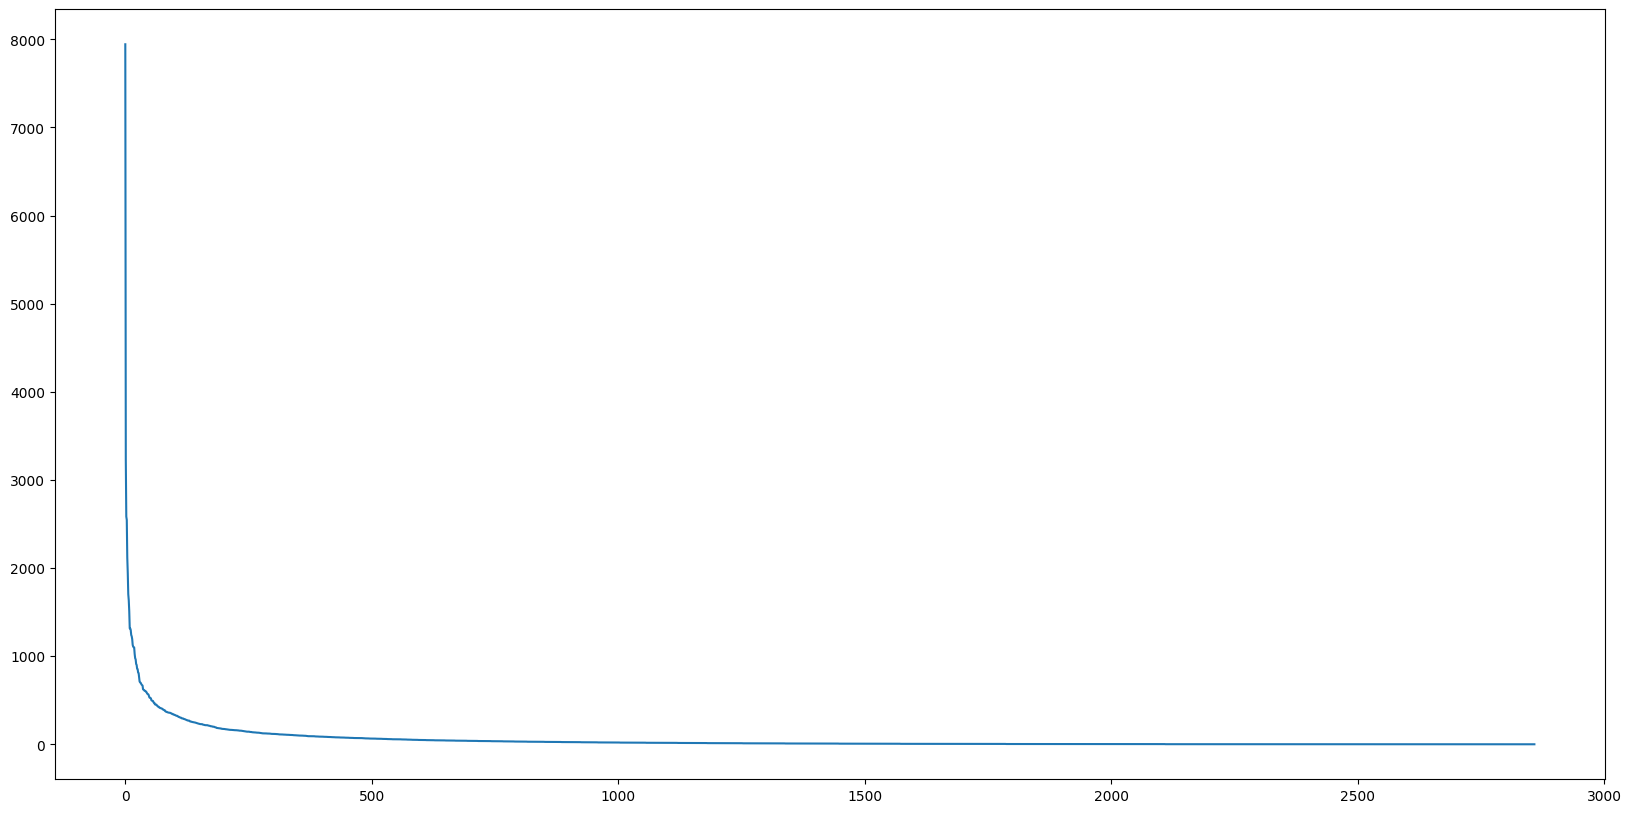

In [55]:
from matplotlib import pyplot as plt
 
item_count = len(sorted_items)
x = []
y = []
for i, item in enumerate(sorted_items.items()):
    x.append(i)
    y.append(item[1])

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(x, y)
plt.show()

In [45]:
print(len(sorted_items))

2859


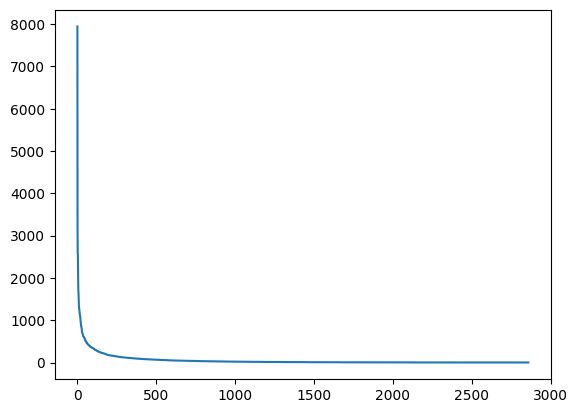